# ML
### supervised - 예측모델 : 예측대상 - y, target, label
- y : 불연속값 => classification(분류분석) : logisticRegression, knnClassifier, naive baisian classifier, svClassifier, decisiontreeClassifier, ensembleClassifier   
- y : 연속값 => regression(회귀분석) : linearRegression, knnRegressior, naive baisian regressor, svcRegressor, decisiontreeRegressor, ensembleRegressor
### unsupervised - 예측모델x, 예측대상 없음
- clustering(군집분석)

##### train test split
data eda/preprocessing   
\-> y(target), x(input) divide   
\-> x_train, x_test, y_train, y_test = train_test_split(x,y)   
\-> algorithm import   
\-> algorithm.fit(x_train, y_train) => model 생성   
\-> preds = model.predict(x_test)   
\-> preds VS y_test

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('./ml_source_files/Classified Data', index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [42]:
# binary classification
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS', axis=1)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

In [45]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [46]:
preds = knn.predict(x_test)
preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0])

In [47]:
knn.score(x_test, y_test)

0.935

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        92
           1       0.94      0.94      0.94       108

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200



In [49]:
acc=[]
for k in range(1,100):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    acc.append(knn.score(x_test, y_test))
acc

[0.92,
 0.91,
 0.94,
 0.93,
 0.94,
 0.94,
 0.935,
 0.945,
 0.935,
 0.935,
 0.94,
 0.94,
 0.945,
 0.935,
 0.94,
 0.935,
 0.945,
 0.94,
 0.935,
 0.93,
 0.935,
 0.94,
 0.94,
 0.935,
 0.94,
 0.935,
 0.935,
 0.94,
 0.94,
 0.935,
 0.935,
 0.935,
 0.935,
 0.94,
 0.94,
 0.94,
 0.945,
 0.94,
 0.945,
 0.945,
 0.945,
 0.945,
 0.935,
 0.935,
 0.935,
 0.93,
 0.935,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.935,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.93,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.94,
 0.94,
 0.94,
 0.935,
 0.935,
 0.93]

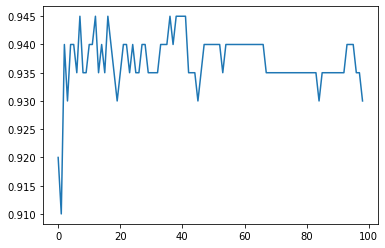

In [50]:
plt.plot(acc)

In [51]:
np.array(acc).argmax()

7

In [53]:
knn = KNeighborsClassifier(n_neighbors=8)  # +1 해줘야함!!
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        92
           1       0.95      0.94      0.95       108

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

